In [1]:
import os
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import constants
from src.models.knn_model import KNN

In [2]:
article_summary = pd.read_csv(f'{constants.CLEAN_DIR}/{constants.Text_Prefix}summary.csv')
image_summary =  pd.read_csv(f'{constants.CLEAN_DIR}/{constants.Media_Prefix}summary.csv')
preview_dir = f'{constants.DATA_DIR}/preview'

In [3]:
knn = KNN()
test_tags = ['bernie sanders', 'hillary clinton', 'jackie cilley', 'presidential elections', 'campaigns',
             'elizabeth warren', 'government and politics', 'sherrod brown', 'political endorsements', 'elections',
             'state elections', 'united states presidential election', 'u.s. democratic party',
             'national elections', 'kamala harris', 'kirsten gillibrand', 'social issues']

k = 4
article_ids, scores = knn.predict_articles(test_tags, k=k)
image_ids, scores = knn.predict_images(test_tags, k=k)
print(image_ids)
print(article_ids)

['998efaa3c41448499d1f4a122014cd1f', '31367248da7e47369434bfe6eb32a64b', '9cacd8963b264c06b9ee78d9b9a74c09', 'c3c37301b2064bbc9f4a9df0bc645b20']
['23360f1b3e5845798b524faaed89a87d', 'a63feb611dbe4d38a027ec74c2bf1450', 'bf027713a0be497fb96d168ba9201e6f', '2572f844ea074460a2f95243c433f9bc']


Top 4 matching articles
Sanders' 2016 backers in New Hampshire holding back for now
Sanders vs. Clinton: 2016 rivalry proves hard to overcome
Democratic Socialists group endorses Bernie Sanders for 2020
Biden hires strategist Symone Sanders, adds diversity to bid


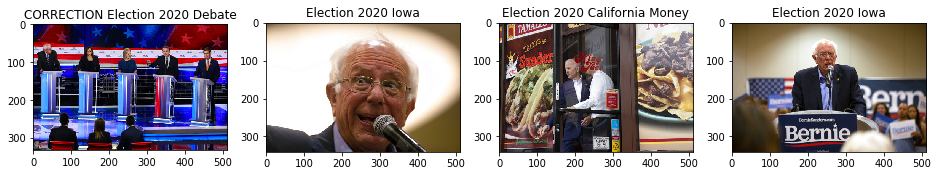

In [4]:
print(f'Top {k} matching articles')
for art_id in article_ids:
    print(article_summary[article_summary['id'] == art_id].headline.values[0])

fig, ax = plt.subplots(nrows=1, ncols=k, figsize=(16,4))
ax = ax.ravel()

for i, img_id in enumerate(image_ids):
    img_file = plt.imread(f'{preview_dir}/{img_id}.jpg')
    title = image_summary[image_summary['id'] == img_id].title.values[0]
    ax[i].imshow(img_file)
    ax[i].set_title(title)

---